<a href="https://colab.research.google.com/github/GB-studyingcode/Cohort-Analysis/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practice Python/Online Retail.xlsx - Online Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
df.loc[df['CustomerID'].notna()].groupby('InvoiceNo')['CustomerID'].agg(lambda s: s.iloc[0] if s.nunique()==1 else None).dropna()  # chỉ lấy khi duy nhất, else None



,CustomerID
InvoiceNo,
536365,17850.0
536366,17850.0
536367,13047.0
536368,13047.0
536369,13047.0
...,...
C581484,16446.0
C581490,14397.0
C581499,15498.0


In [ ]:
df.loc[df['CustomerID'].notna()].groupby('InvoiceNo')['CustomerID'].nunique().rename('n_customer_per_invoice').reset_index()



,InvoiceNo,n_customer_per_invoice
0,536365,1
1,536366,1
2,536367,1
3,536368,1
4,536369,1
...,...,...
22185,C581484,1
22186,C581490,1
22187,C581499,1
22188,C581568,1


# Data Processing and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df = df[df['CustomerID'].notnull()]

In [ ]:
df = df[['InvoiceDate','CustomerID']].drop_duplicates()

# Processing Invoice Date

In [ ]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'],format = 'mixed')

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

In [ ]:
df.reset_index(drop =True, inplace = True)

# Build Cohort Model

In [ ]:
 df_FirstInvoice  = df.groupby('CustomerID', as_index=False).agg(FirstInvoiceDate=('InvoiceDate', 'min'))

In [ ]:
 df = pd.merge(df,df_FirstInvoice,on ='CustomerID',how = 'left')

In [ ]:
df['CohortIndex'] = ((df['InvoiceDate'] - df['FirstInvoiceDate']).dt.days/30).astype(int)

In [ ]:
df['Cohort_Month'] = df['FirstInvoiceDate'].dt.to_period('M')
df

,InvoiceDate,CustomerID,FirstInvoiceDate,CohortIndex,Cohort_Month
0,2010-12-01 08:26:00,17850,2010-12-01 08:26:00,0,2010-12
1,2010-12-01 08:28:00,17850,2010-12-01 08:26:00,0,2010-12
2,2010-12-01 08:34:00,13047,2010-12-01 08:34:00,0,2010-12
3,2010-12-01 08:35:00,13047,2010-12-01 08:34:00,0,2010-12
4,2010-12-01 08:45:00,12583,2010-12-01 08:45:00,0,2010-12
...,...,...,...,...,...
22029,2011-12-09 12:23:00,13777,2010-12-01 16:01:00,12,2010-12
22030,2011-12-09 12:25:00,13777,2010-12-01 16:01:00,12,2010-12
22031,2011-12-09 12:31:00,15804,2011-05-25 10:12:00,6,2011-05
22032,2011-12-09 12:49:00,13113,2010-12-08 13:07:00,12,2010-12


# Pivot Dataset to Cohort Table

In [ ]:
df_matrix  = df.pivot_table(index='Cohort_Month',columns ='CohortIndex',values = 'CustomerID',aggfunc = 'nunique')

In [ ]:
df_matrix

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,,
2010-12,948.0,352.0,334.0,370.0,326.0,358.0,355.0,331.0,330.0,366.0,382.0,476.0,182.0
2011-01,421.0,107.0,118.0,127.0,126.0,124.0,102.0,113.0,139.0,144.0,131.0,13.0,NaN
2011-02,380.0,84.0,92.0,110.0,80.0,100.0,91.0,112.0,107.0,100.0,12.0,NaN,NaN
2011-03,440.0,81.0,106.0,100.0,89.0,89.0,110.0,117.0,97.0,20.0,NaN,NaN,NaN
2011-04,299.0,80.0,54.0,66.0,54.0,69.0,74.0,72.0,10.0,NaN,NaN,NaN,NaN
2011-05,279.0,56.0,42.0,56.0,69.0,61.0,78.0,6.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,39.0,49.0,59.0,66.0,69.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,34.0,40.0,46.0,46.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,35.0,50.0,39.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization

## Monthly Cohort

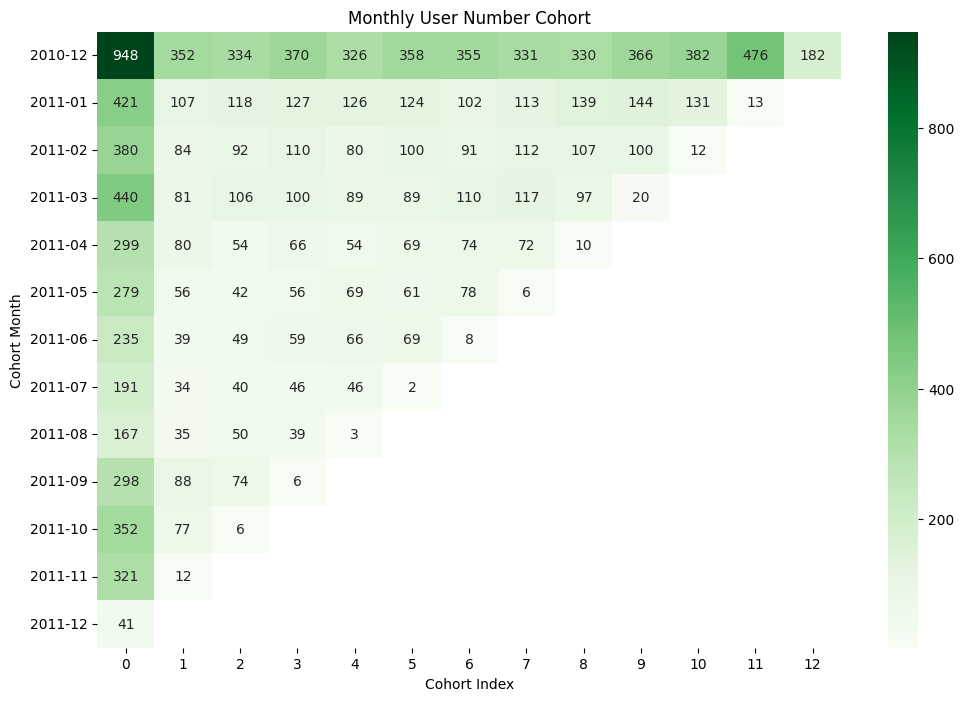

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(df_matrix,
            annot = True,
            fmt ='g',
            cmap ='Greens')
plt.title('Monthly User Number Cohort')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

## Heatmap based on Retention Rate

In [ ]:
df_cohort = df_matrix.copy()

In [ ]:
for i in range(1,13):
  df_cohort[i] = df_cohort[i]/df_cohort[0]

df_cohort

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,,
2010-12,948.0,0.371308,0.352321,0.390295,0.343882,0.377637,0.374473,0.349156,0.348101,0.386076,0.402954,0.502110,0.191983
2011-01,421.0,0.254157,0.280285,0.301663,0.299287,0.294537,0.242280,0.268409,0.330166,0.342043,0.311164,0.030879,NaN
2011-02,380.0,0.221053,0.242105,0.289474,0.210526,0.263158,0.239474,0.294737,0.281579,0.263158,0.031579,NaN,NaN
2011-03,440.0,0.184091,0.240909,0.227273,0.202273,0.202273,0.250000,0.265909,0.220455,0.045455,NaN,NaN,NaN
2011-04,299.0,0.267559,0.180602,0.220736,0.180602,0.230769,0.247492,0.240803,0.033445,NaN,NaN,NaN,NaN
2011-05,279.0,0.200717,0.150538,0.200717,0.247312,0.218638,0.279570,0.021505,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,0.165957,0.208511,0.251064,0.280851,0.293617,0.034043,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,0.178010,0.209424,0.240838,0.240838,0.010471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,0.209581,0.299401,0.233533,0.017964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_cohort[0] = 1
df_cohort

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,,
2010-12,1,0.371308,0.352321,0.390295,0.343882,0.377637,0.374473,0.349156,0.348101,0.386076,0.402954,0.502110,0.191983
2011-01,1,0.254157,0.280285,0.301663,0.299287,0.294537,0.242280,0.268409,0.330166,0.342043,0.311164,0.030879,NaN
2011-02,1,0.221053,0.242105,0.289474,0.210526,0.263158,0.239474,0.294737,0.281579,0.263158,0.031579,NaN,NaN
2011-03,1,0.184091,0.240909,0.227273,0.202273,0.202273,0.250000,0.265909,0.220455,0.045455,NaN,NaN,NaN
2011-04,1,0.267559,0.180602,0.220736,0.180602,0.230769,0.247492,0.240803,0.033445,NaN,NaN,NaN,NaN
2011-05,1,0.200717,0.150538,0.200717,0.247312,0.218638,0.279570,0.021505,NaN,NaN,NaN,NaN,NaN
2011-06,1,0.165957,0.208511,0.251064,0.280851,0.293617,0.034043,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1,0.178010,0.209424,0.240838,0.240838,0.010471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1,0.209581,0.299401,0.233533,0.017964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


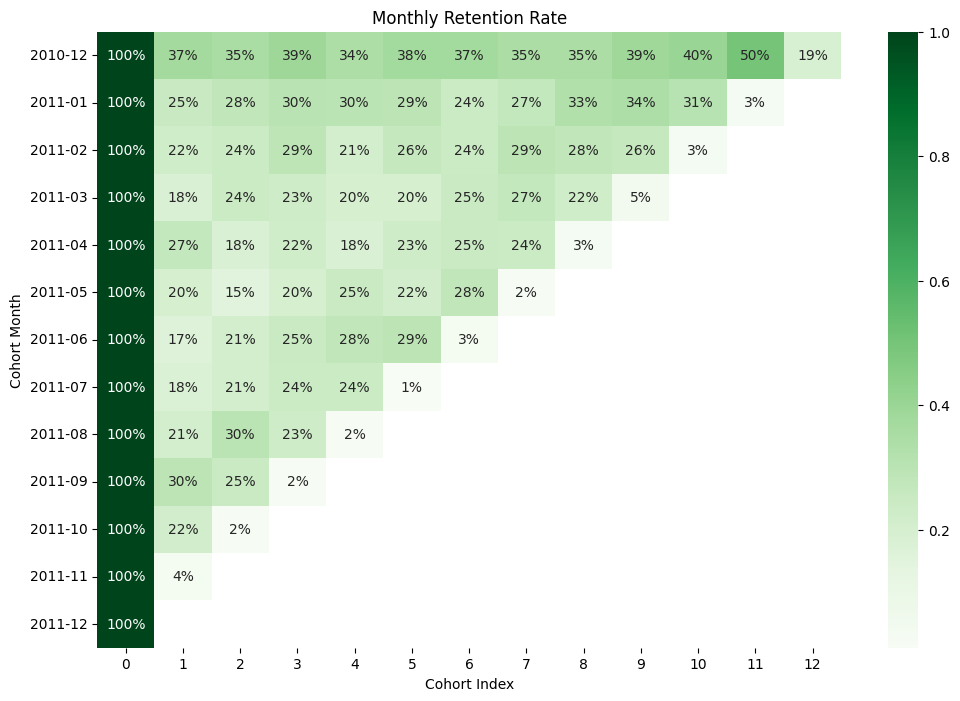

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(df_cohort,
            annot = True,
            fmt ='.0%',
            cmap ='Greens')
plt.title('Monthly Retention Rate')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

# Churn Rate

In [ ]:
df_churn = df_cohort.copy()

In [ ]:
for i in  range(1,13):
  df_churn[i] = 1 - df_churn[i]

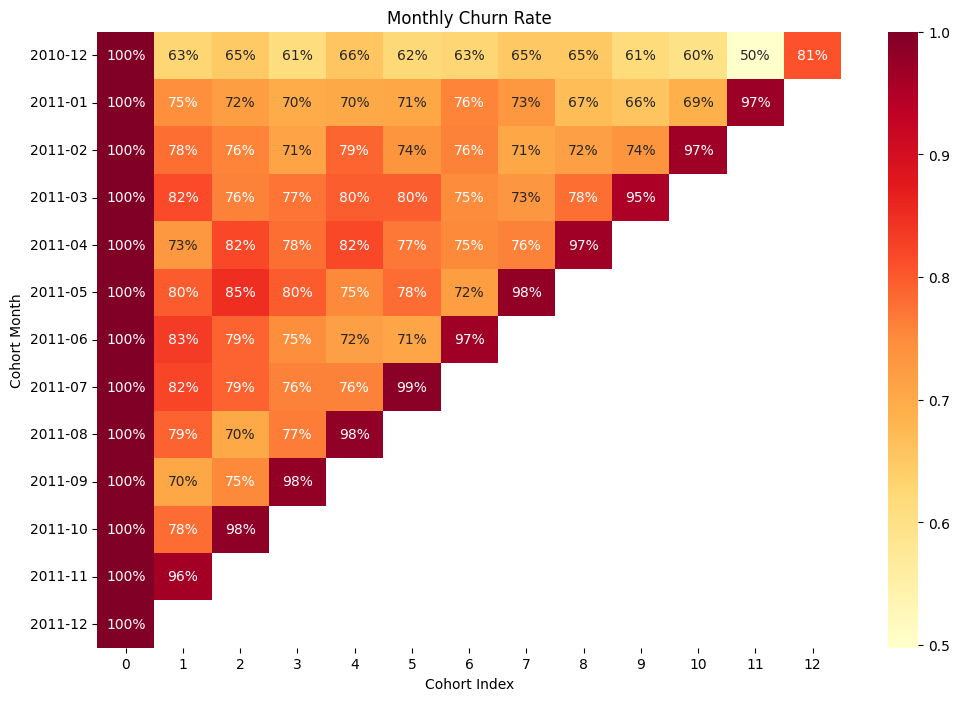

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(df_churn,
            annot = True,
            fmt ='.0%',
            cmap ='YlOrRd')
plt.title('Monthly Churn Rate')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

### Nhận xét:


*   Đọc theo hàng dọc (cột month 0)
    + Số lượng KH mới cao (cao nhất là vào T12-2010) - có thể do nhu cầu mua quà tặng lớn vào dịp Giáng sinh & năm mới. Nhóm này có tỷ lệ RRM cao nhất trong các nhóm.
    + Theo thời gian, SL KH mới giảm dần đều
    => Việc thu hút KH mới chưa ổn định theo thời gian và có xu hướng giảm mạnh ở vài tháng gần đây (-30%). Insights: đa phần KH là One-time customers (mua 1 lần rồi thôi).

*   Giữ chân KH cũ (RRM - retention rate monthly):
    + Tỷ lệ giữ chân KH còn thấp (trung bình 20-40%)
    + ở ngay tại tháng thứ nhất, tỷ lệ giữ chân cũng thấp (20-35%)
    + Điểm sáng duy nhất là những tháng sau đó, RRM cũng ko có quá nhiều biến động, giữ mức ổn định (chưa có tháng nào dưới 15%).

* KH rời bỏ (churned rate monthly -CRM):
    + CRM rất cao (70-80%/ trung bình tháng). Ở ngay tháng đầu tiên (Month 1) CRM đã cao (60-gần 90%)


### Đề xuất, Kiến nghị:
* Thay vì cố gắng gia tăng RRM, tập trung thu hút KH mới (new customers) -> nhóm này sẽ là tiềm năng hơn, vì chúng ta chưa có kinh nghiệm giữ chân được KH quay trở lại. (gợi ý: bơm thêm $ cho chạy ads... Để gia tăng về mặt branding)

* Ngoài ra vẫn duy trì giữ chân KH cũ (có chiến lược re-sell thích hợp)
* Nghiên cứu thêm về hành vi mua sắm của nhóm KH new tại T12/2010 xem tại sao nhóm này có tỷ lệ RRM tốt hơn. Nhân bản chiến dịch đã áp dụng tại thời điểm này cho thời gian sau.
